<img src="Python.png" width="200">

# Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# Pre-processing

## Defining data sources

In [2]:
URL_LISTINGS = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-12-17/visualisations/listings.csv"
URL_LISTINGS_DETAILED = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-12-17/data/listings.csv.gz"
URL_REVIEWS = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-12-17/visualisations/reviews.csv"
URL_REVIEWS_DETAILED = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-12-17/data/reviews.csv.gz"
URL_CALENDAR = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-12-17/data/calendar.csv.gz"
URL_NEIGHBOURHOODS = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-12-17/visualisations/neighbourhoods.csv"
URL_NEIGHBOURHOODS_GEO = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-12-17/visualisations/neighbourhoods.geojson"

## Loading data sets into pandas

In [3]:
df_listings = pd.read_csv(URL_LISTINGS)
df_listings_detailed = pd.read_csv(URL_LISTINGS_DETAILED, compression='gzip')
# df_reviews = pd.read_csv(URL_REVIEWS)
# df_reviews_detailed = pd.read_csv(URL_REVIEWS_DETAILED, compression='gzip')
df_calendar = pd.read_csv(URL_CALENDAR, compression='gzip')
df_neighbourhoods = pd.read_csv(URL_NEIGHBOURHOODS)

In [4]:
dfc_listings = df_listings.copy()
dfc_listings_detailed = df_listings_detailed.copy()
#dfc_reviews = df_reviews.copy()
#dfc_reviews_detailed = df_reviews_detailed.copy()
dfc_calendar = df_calendar.copy()
dfc_neighbourhoods = df_neighbourhoods.copy()

## Data Exploration

Let us have a look at the dataset. First of all we want to know the size, the columns and the type of the dataset.

In [5]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20352 entries, 0 to 20351
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20352 non-null  int64  
 1   name                            20349 non-null  object 
 2   host_id                         20352 non-null  int64  
 3   host_name                       20347 non-null  object 
 4   neighbourhood_group             20352 non-null  object 
 5   neighbourhood                   20352 non-null  object 
 6   latitude                        20352 non-null  float64
 7   longitude                       20352 non-null  float64
 8   room_type                       20352 non-null  object 
 9   price                           20352 non-null  int64  
 10  minimum_nights                  20352 non-null  int64  
 11  number_of_reviews               20352 non-null  int64  
 12  last_review                     

Secoundly a statistical description helps to give a feeling for the dataset. Here we only choose coloums for which this description makes sense.

In [6]:
df_listings[['price','minimum_nights','number_of_reviews','calculated_host_listings_count', 'availability_365']].describe(include='all')

price  minimum_nights  number_of_reviews  \
count  20352.000000    20352.000000       20352.000000   
mean     115.756732        6.120381          31.665537   
std      354.502984       30.964229          63.130360   
min        0.000000        1.000000           0.000000   
25%       35.000000        1.000000           0.000000   
50%       59.000000        2.000000           4.000000   
75%      100.000000        3.000000          32.000000   
max     9999.000000     1125.000000         678.000000   

       calculated_host_listings_count  availability_365  
count                    20352.000000      20352.000000  
mean                        11.183471        153.010711  
std                         28.264229        149.119819  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          2.000000         90.000000  
75%                          7.000000        340.000000  
max                        197.000000        365.000000

## Outliers

In [19]:
def removeOutliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 

    filter = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 *IQR)
    df.loc[filter].drop(axis = 1)

def plotBoxplot (df, columns):
    fig = plt.figure(figsize=(15, 6))

    for column1 in columns:
        fig.add_subplot(1,len(columns),columns.index(column1)+1).boxplot(column = column1)

    return fig  
        


(20352, 16)
(9362, 16)
365


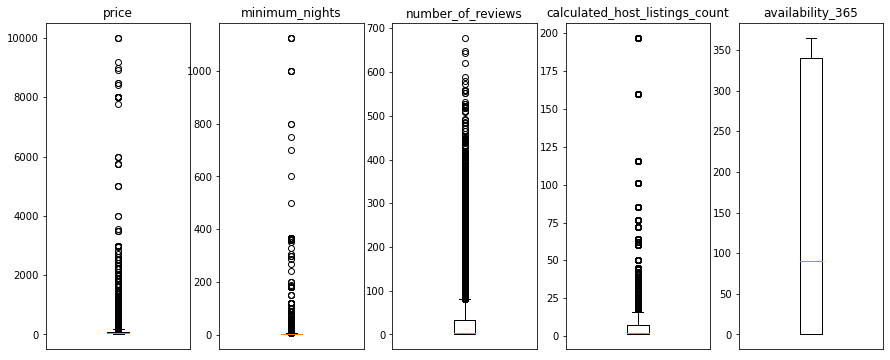

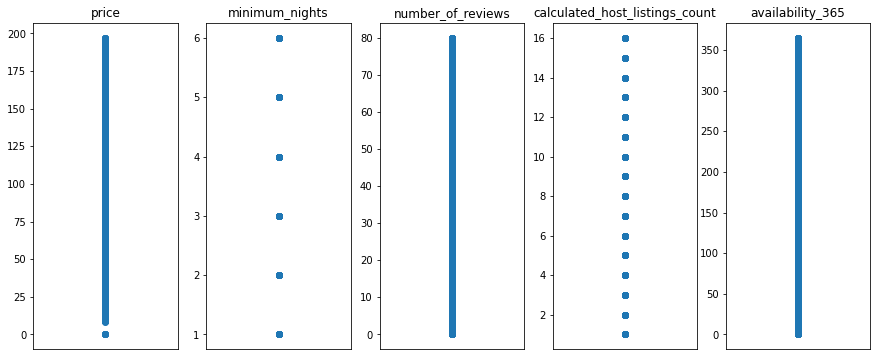

In [48]:
fig1 = plt.figure(figsize=(15, 6))
ax1 = fig1.add_subplot(1,5,1)
ax2 = fig1.add_subplot(1,5,2)
ax3 = fig1.add_subplot(1,5,3)
ax4 = fig1.add_subplot(1,5,4)
ax5 = fig1.add_subplot(1,5,5)

ax1.boxplot(dfc_listings['price'])
ax1.set_title('price')
ax1.get_xaxis().set_visible(False)

ax2.boxplot(dfc_listings['minimum_nights'])
ax2.set_title('minimum_nights')
ax2.get_xaxis().set_visible(False)

ax3.boxplot(dfc_listings['number_of_reviews'])
ax3.set_title('number_of_reviews')
ax3.get_xaxis().set_visible(False)

ax4.boxplot(dfc_listings['calculated_host_listings_count'])
ax4.set_title('calculated_host_listings_count')
ax4.get_xaxis().set_visible(False)

ax5.boxplot(dfc_listings['availability_365'])
ax5.set_title('availability_365')
ax5.get_xaxis().set_visible(False)

fig1.show()


#removing outliers
print(dfc_listings.shape)

sorted(dfc_listings)

Q1=dfc_listings.quantile(0.25)
Q3=dfc_listings.quantile(0.75)
IQR=Q3-Q1

dfc_listings_cleared = dfc_listings[~((dfc_listings < (Q1 - 1.5 * IQR)) |(dfc_listings > (Q3 + 1.5 * IQR))).any(axis=1)]

print(dfc_listings_cleared.shape)
print(max(dfc_listings_cleared['availability_365']))

fig2 = plt.figure(figsize=(15, 6))
ax1 = fig2.add_subplot(1,5,1)
ax2 = fig2.add_subplot(1,5,2)
ax3 = fig2.add_subplot(1,5,3)
ax4 = fig2.add_subplot(1,5,4)
ax5 = fig2.add_subplot(1,5,5)

ax1.scatter([0]* len(dfc_listings_cleared), dfc_listings_cleared['price'])
ax1.set_title('price')
ax1.get_xaxis().set_visible(False)

ax2.scatter([0]* len(dfc_listings_cleared), dfc_listings_cleared['minimum_nights'])
ax2.set_title('minimum_nights')
ax2.get_xaxis().set_visible(False)

ax3.scatter([0]* len(dfc_listings_cleared), dfc_listings_cleared['number_of_reviews'])
ax3.set_title('number_of_reviews')
ax3.get_xaxis().set_visible(False)

ax4.scatter([0]* len(dfc_listings_cleared), dfc_listings_cleared['calculated_host_listings_count'])
ax4.set_title('calculated_host_listings_count')
ax4.get_xaxis().set_visible(False)

ax5.scatter([0]* len(dfc_listings_cleared), dfc_listings_cleared['availability_365'])
ax5.set_title('availability_365')
ax5.get_xaxis().set_visible(False)

fig2.show()

#TODO for availability_365 the this makes not to much sense
